In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
type(housing)

sklearn.utils._bunch.Bunch

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

## Prepare the data

In [ ]:
data = pd.DataFrame(housing.data, columns=housing.feature_names)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [ ]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [ ]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
data["Price"] = housing.target

In [ ]:
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

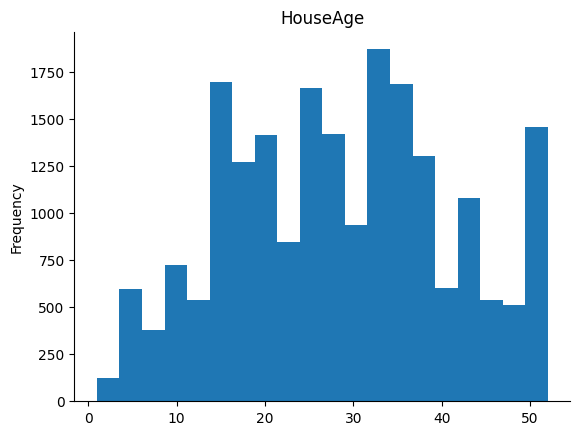

In [ ]:
# @title HouseAge

from matplotlib import pyplot as plt
data['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

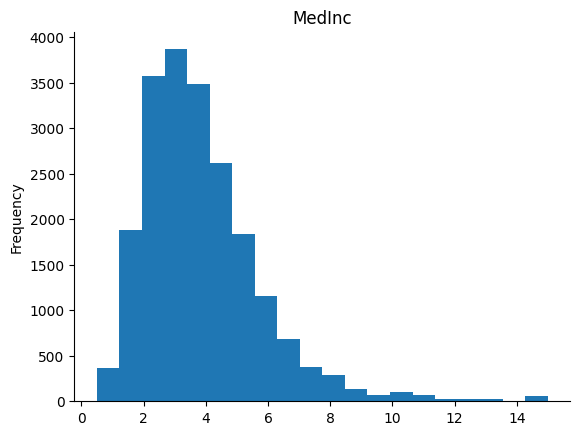

In [ ]:
# @title MedInc

from matplotlib import pyplot as plt
data['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


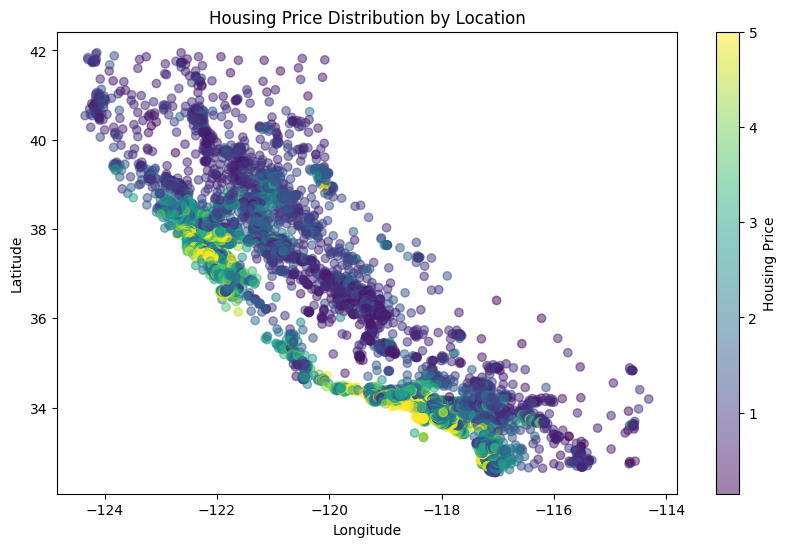

In [ ]:
# @title Housing Price Distribution by Location

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Housing Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
_ = plt.title('Housing Price Distribution by Location')

In [ ]:
import plotly.express as px

# Create the scatter plot using Plotly
fig = px.scatter(
    data,
    x='Longitude',
    y='Latitude',
    color='Price',
    color_continuous_scale='Viridis',
    opacity=0.5,
    labels={'Price': 'Housing Price', 'Longitude': 'Longitude', 'Latitude': 'Latitude'},
    title='Housing Price Distribution by Location'
)

# Update layout for better visualization
fig.update_layout(
    coloraxis_colorbar=dict(title='Housing Price'),
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)

# Show the figure
fig.show()

In [ ]:
data.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Latitude    1.000000  -0.924664 -0.144160  
Longitude  -0.924664   1.000000 -0.045967  
Price      -0.144160  -0.045967  1.000000

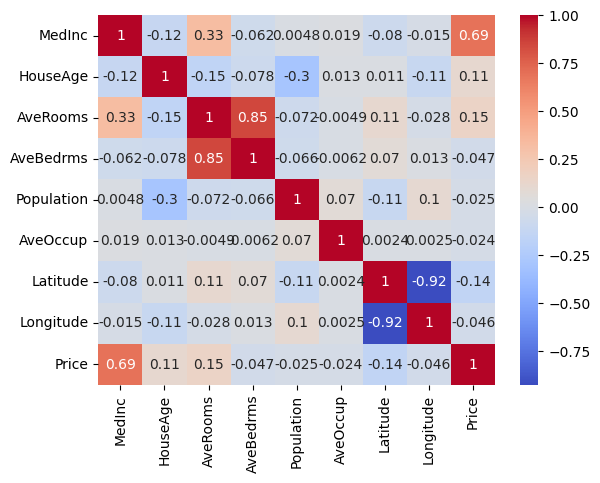

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

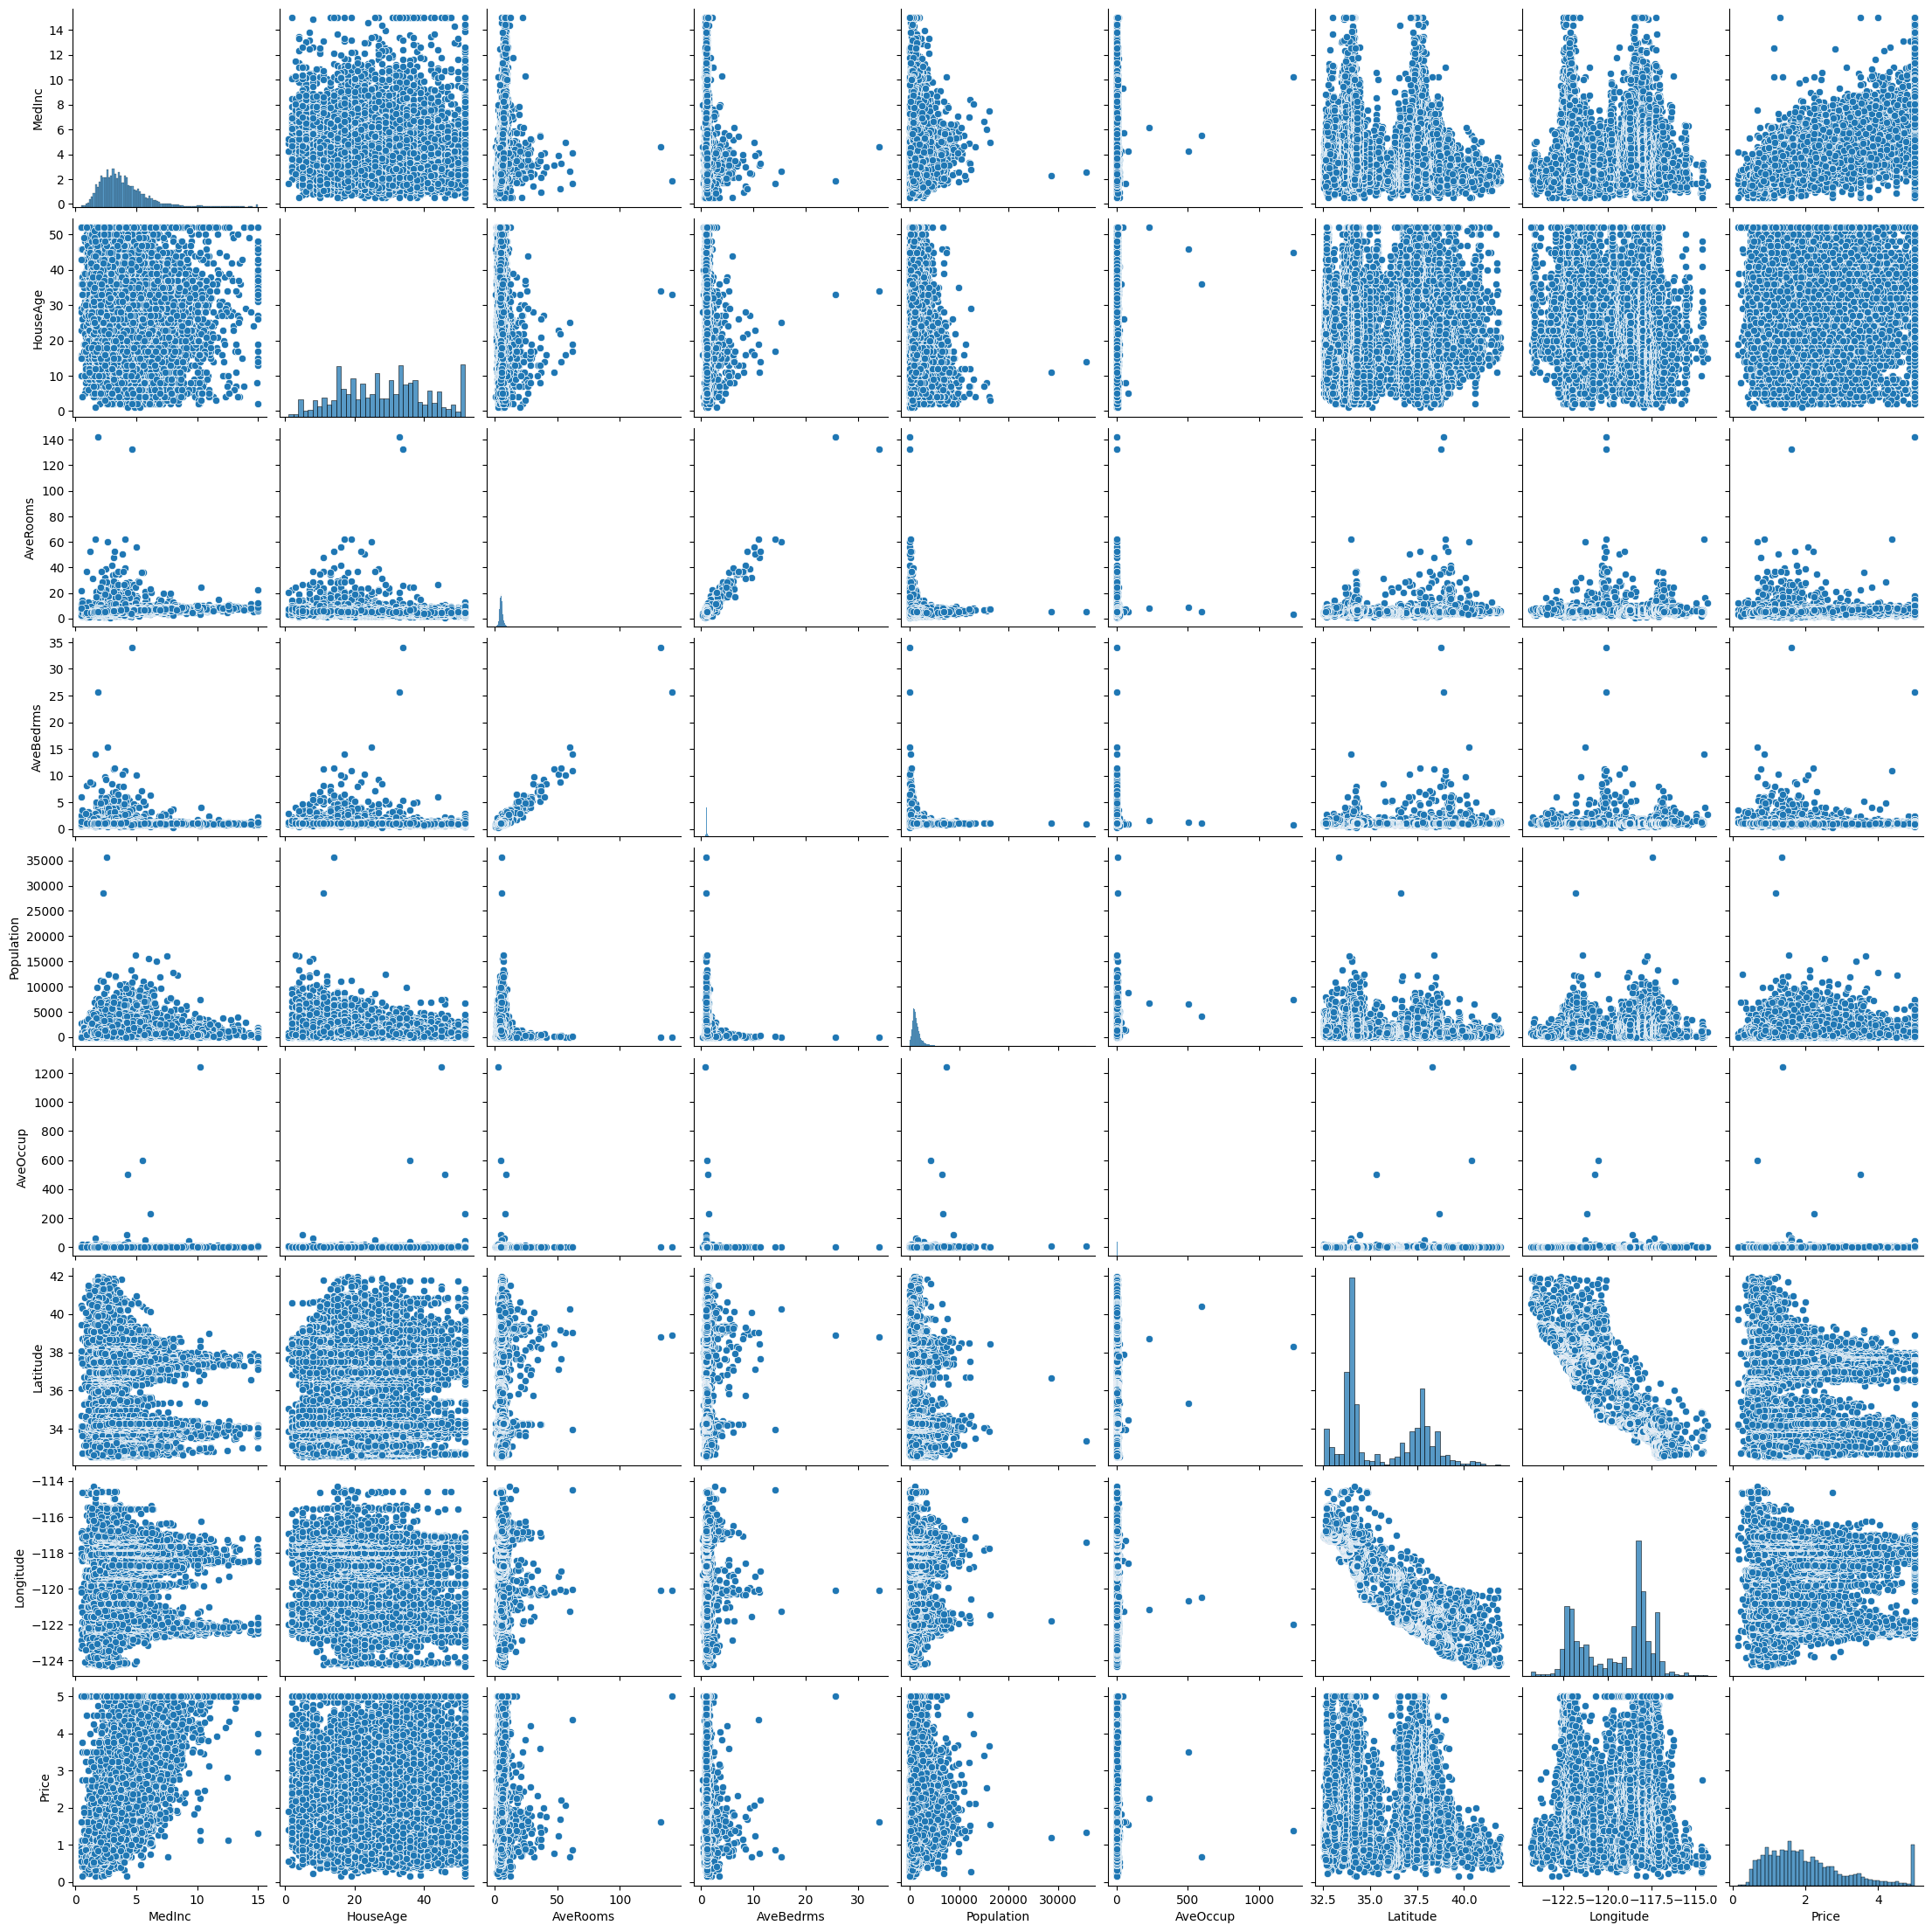

In [ ]:
sns.pairplot(data, kind='scatter')
plt.show()

## Determine outliers in the dataset

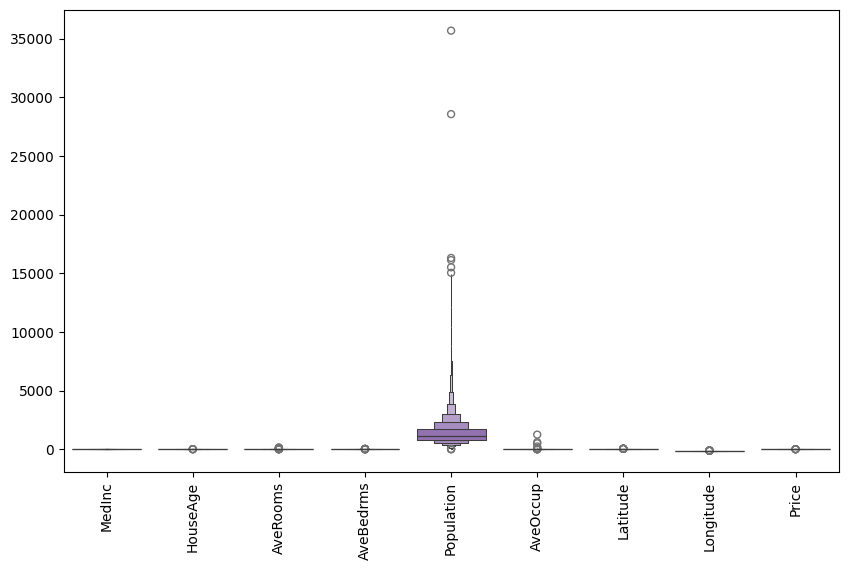

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(data=data, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px

# Create a box plot using Plotly
fig = px.box(
    data,
    points="all",  # Show all data points (equivalent to a boxen plot)
    title="Box Plot of Features",
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Values",
    xaxis_tickangle=90,  # Rotate x-axis labels
    boxmode="overlay"  # Overlay boxes if there are multiple categories
)

# Show the figure
fig.show()

In [ ]:
import pandas as pd

def remove_outliers(df, columns, threshold=1.5):
    """
    Remove outliers from the specified columns of a DataFrame using the IQR method.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        columns (list): List of column names to check for outliers.
        threshold (float): The multiplier for the IQR range. Default is 1.5.

    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
    """
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
            Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile range

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Filter the dataset to keep only rows within the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        else:
            print(f"Column '{col}' not found in the DataFrame.")

    return df

data = pd.DataFrame(data)

print("Original DataFrame:")
print(data)

# Remove outliers
data_clean = remove_outliers(data, columns=data.columns)
print("\nDataFrame after removing outliers:")
data_clean

Original DataFrame:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  P

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
...       ...       ...       ...        ...         ...       ...       ...   
20634  3.7125      28.0  6.779070   1.148256      1041.0  3.026163     39.27   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
3        -122.25  3.413  
4        -122.25  3.422  
5        -122.25  2.697  
6        -122.25  2.992  
7        -122.25  2.414  
...          ...    ...  
20634    -121.56  1.168  
20635    -121.09  0.781  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894  

[16232 rows x 9 columns]

In [ ]:
# Split the data into indpendent and target features
X = data_clean.drop('Price', axis=1)
y = data_clean['Price']

#X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

In [ ]:
X

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
...       ...       ...       ...        ...         ...       ...       ...   
20634  3.7125      28.0  6.779070   1.148256      1041.0  3.026163     39.27   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
3        -122.25  
4        -122.25  
5        -122.25  
6        -122.25  
7        -122.25  
...          ...  
20634    -121.56  
20635    -121.09  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[16232 rows x 8 columns]

In [ ]:
y

3        3.413
4        3.422
5        2.697
6        2.992
7        2.414
         ...  
20634    1.168
20635    0.781
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 16232, dtype: float64

In [ ]:
# Split the data into trainig and test sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4302   1.9063      52.0  3.603399   0.912181       984.0  2.787535     34.09   
17739  5.9399      10.0  6.036424   1.048565      3083.0  3.402870     37.30   
1001   3.5532      36.0  4.534946   1.000000       950.0  2.553763     37.68   
4625   3.5909      25.0  4.126506   1.064759      1420.0  2.138554     34.07   
613    4.6042      51.0  6.664122   1.025445       922.0  2.346056     37.73   
...       ...       ...       ...        ...         ...       ...       ...   
17206  2.5694      27.0  3.143770   0.955272       777.0  2.482428     34.43   
6812   3.6083      33.0  5.445000   1.112500      1153.0  2.882500     34.09   
969    6.0604      20.0  6.219409   0.993671      1181.0  2.491561     37.67   
20077  2.5729      16.0  5.241259   1.139860       733.0  2.562937     38.04   
9231   1.9063      18.0  5.661972   1.070423       213.0  3.000000     37.06   

       Longitude  
4302     -118.29  
17739    -121.79  
1001     -121.77  
4625     -118.32  
613      -122.14  
...          ...  
17206    -119.72  
6812     -118.07  
969      -121.89  
20077    -120.35  
9231     -120.08  

[12985 rows x 8 columns]

In [ ]:
x_test

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7794   3.2857      37.0  5.120000   1.151111       981.0  4.360000     33.89   
9480   1.5625      21.0  3.930909   0.923636       715.0  2.600000     39.40   
9273   7.5000       9.0  6.852632   0.931579       682.0  3.589474     38.15   
11949  3.9118      32.0  5.527059   1.063529      1479.0  3.480000     33.94   
13831  5.5875       9.0  7.593668   1.064644      2158.0  2.846966     34.51   
...       ...       ...       ...        ...         ...       ...       ...   
19855  2.3365      22.0  6.468085   1.180851      1076.0  3.815603     36.35   
18523  4.2254      15.0  5.504065   1.087805      1571.0  2.554472     36.98   
18793  4.5357      13.0  5.850485   0.943689      1361.0  2.642718     40.52   
6420   3.6336      27.0  5.319631   1.081376      2899.0  2.432047     34.14   
11081  3.5900      34.0  6.109756   1.009146       843.0  2.570122     33.80   

       Longitude  
7794     -118.08  
9480     -123.36  
9273     -122.58  
11949    -117.44  
13831    -117.23  
...          ...  
19855    -119.45  
18523    -122.06  
18793    -122.66  
6420     -117.98  
11081    -117.84  

[3247 rows x 8 columns]

In [ ]:
# Normalizing the data points
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
x_test_norm = scaler.transform(x_test)

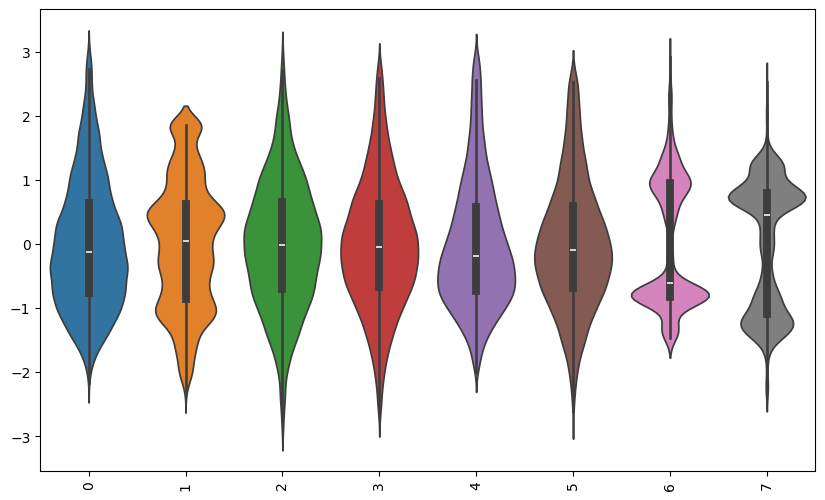

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=X_train_norm, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Support Vector Regression
from sklearn.svm import SVR

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# XGBoost Regression
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [ ]:
lin_reg.coef_

array([ 0.64159016,  0.12804026, -0.12648391,  0.0840705 ,  0.04956086,
       -0.22675696, -0.8371876 , -0.78114886])

In [ ]:
lin_reg.intercept_

1.916054524451291

In [ ]:
y_pred_lin_reg = lin_reg.predict(x_test_norm)

In [ ]:
y_pred_lin_reg

array([1.49889721, 0.94353717, 2.94565416, ..., 1.303577  , 2.14879767,
       1.88160879])

In [ ]:
residuals = y_test - y_pred_lin_reg
residuals

7794     0.037103
9480    -0.228537
9273     1.286346
11949   -0.512280
13831   -0.209395
           ...   
19855    0.126247
18523    0.599654
18793    0.408423
6420     0.203202
11081    0.424391
Name: Price, Length: 3247, dtype: float64

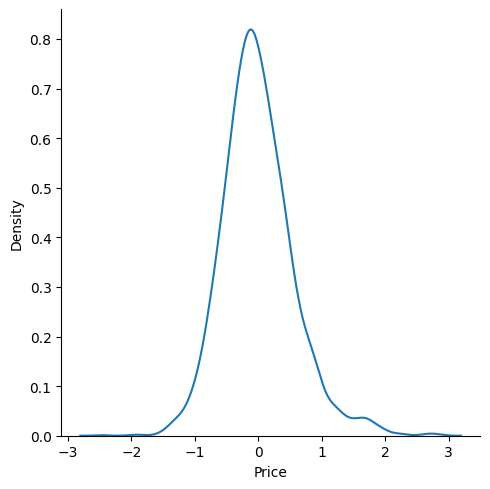

In [ ]:
sns.displot(residuals, kind='kde')

In [ ]:
accuracy = r2_score(y_test, y_pred_lin_reg)
accuracy

0.6241786277437548

In [ ]:
error = mean_squared_error(y_test, y_pred_lin_reg)
error

0.31467607126870073

In [ ]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
y_pred = xgb_model.predict(x_test_norm)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2105570312181693


In [ ]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7485292348681858

In [ ]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_norm, y_train)

SVR()

In [ ]:
y_pred = svr_model.predict(x_test_norm)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.23078367524731508


In [ ]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7243723134838421

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred = tree_model.predict(x_test_norm)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3858286195562051


In [ ]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.5392002935821308

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_norm, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test_norm)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18651324449947643


In [ ]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7772450151384298

In [ ]:
gbr_model = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual regression estimators
    random_state=42
)
gbr_model.fit(X_train_norm, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gbr_model.predict(x_test_norm)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.210124222011053


In [ ]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.749046144048753